# Linear regression using one variable

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('canada_per_capita_income.csv')

In [45]:
df.head(5)
for col in df.columns:
    print(col)

year
per capita income (US$)


In [54]:
#renaming the column 'per capita income (US $)' to 'income'
mapping = {df.columns[1]: 'income'}
df = df.rename(columns=mapping)

In [57]:
%matplotlib inline

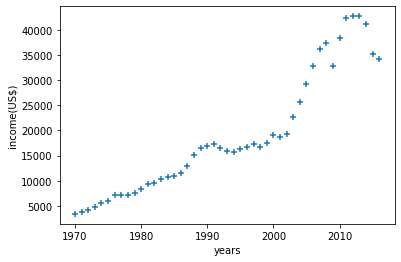

In [58]:
#Plotting the csv in a graph using matplotlib
plt.xlabel('years')
plt.ylabel('income(US$)')
plt.scatter(df.year, df.income, marker="+")

In [65]:
# Create a linear regression object
linearReg = linear_model.LinearRegression()
linearReg.fit(df[['year']],df.income)

LinearRegression()

In [66]:
linearReg.predict([[2021]])

array([42117.15916964])

In [67]:
linearReg.coef_

array([828.46507522])

In [74]:
linearReg.intercept_

-1632210.7578554575

In [69]:
# Formula: y= mx + c, where m= slope(coefficient) and c=intercept [x is independent variable and y is dependent]
linearReg.coef_*2021 + linearReg.intercept_

array([42117.15916964])

In [73]:
# Sample data only considering years from 2021 - 2030 is used for prediction
predict_df = pd.read_csv('sample_data_to_predict.csv')

In [72]:
predict_df.head(5)

,year
0,2021
1,2022
2,2023
3,2024
4,2025


In [75]:
# Predicting the income of Canada's per capita income (US $) for the year 2021 - 2030
prediction = linearReg.predict(predict_df)
prediction

array([42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664])

In [79]:
predict_df["canada's per capita income (US $)"] = prediction

In [83]:
new_df = predict_df.drop('income', axis='columns')
new_df.head(5)

,year,canada's per capita income (US $)
0,2021,42117.159170
1,2022,42945.624245
2,2023,43774.089320
3,2024,44602.554395
4,2025,45431.019471


In [84]:
new_df.to_csv('prediction.csv')

# END